In [62]:
import re
import requests
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sympy as sp
from bs4 import BeautifulSoup

### Build the columns of our future document term matrix

In [2]:
# Scrape first link
response = requests.get("https://www.poetryfoundation.org/poems/51900/londons-summer-morning")
soup = BeautifulSoup(response.content, 'html.parser')
divs = soup.find_all('div', class_ = "poem-body overflow-x-auto")

# Clean divs
for div in divs:
    poem_text = div.text.lower()
    poem_text_no_punc = poem_text.translate(str.maketrans('', '', string.punctuation))
    poem = (poem_text_no_punc.split()) # Lower text and include no punctuation when we append

poem

['who',
 'has',
 'not',
 'waked',
 'to',
 'list',
 'the',
 'busy',
 'sounds',
 'of',
 'summer’s',
 'morning',
 'in',
 'the',
 'sultry',
 'smoke',
 'of',
 'noisy',
 'london',
 'on',
 'the',
 'pavement',
 'hot',
 'the',
 'sooty',
 'chimneyboy',
 'with',
 'dingy',
 'face',
 'and',
 'tattered',
 'covering',
 'shrilly',
 'bawls',
 'his',
 'trade',
 'rousing',
 'the',
 'sleepy',
 'housemaid',
 'at',
 'the',
 'door',
 'the',
 'milkpail',
 'rattles',
 'and',
 'the',
 'tinkling',
 'bell',
 'proclaims',
 'the',
 'dustman’s',
 'office',
 'while',
 'the',
 'street',
 'is',
 'lost',
 'in',
 'clouds',
 'impervious',
 'now',
 'begins',
 'the',
 'din',
 'of',
 'hackneycoaches',
 'waggons',
 'carts',
 'while',
 'tinmen’s',
 'shops',
 'and',
 'noisy',
 'trunkmakers',
 'knifegrinders',
 'coopers',
 'squeaking',
 'corkcutters',
 'fruitbarrows',
 'and',
 'the',
 'hungergiving',
 'cries',
 'of',
 'vegetablevendors',
 'fill',
 'the',
 'air',
 'now',
 'every',
 'shop',
 'displays',
 'its',
 'varied',
 'trade'

In [3]:
# Remove stopwords
stopword_list = ['the', 'and', 'is', 'in', 'to', 'of']
poem_no_stopword = [word for word in poem if word not in stopword_list]

### Build the rows of our future document term matrix

In this exercise I am going to define document by sentences of the poem which are split based on punctuation. Our first step in building the document term matrix is to define and pull our documents. 

In [4]:
response = requests.get("https://www.poetryfoundation.org/poems/51900/londons-summer-morning")
soup = BeautifulSoup(response.content, 'html.parser')
divs = soup.find_all('div', class_ = "poem-body overflow-x-auto")

# Clean divs
for div in divs:
    poem_text = div.text.lower()
    # Later note: Needed to remove parentheses since this messed up the sorted structure a few blocks down
    poem_text = re.split(r'[.!?()]', poem_text) # Use regex split so we can split by multiple punctuation types

poem_text # Now we have multiple topics "documents split by punctuation"

['who has not waked to list the busy sounds of summer’s morning, in the sultry smoke of noisy london',
 ' on the pavement hot the sooty chimney-boy, with dingy face and tattered covering, shrilly bawls his trade, rousing the sleepy housemaid',
 ' at the door the milk-pail rattles, and the tinkling bell proclaims the dustman’s office; while the street is lost in clouds impervious',
 ' now begins the din of hackney-coaches, waggons, carts; while tinmen’s shops, and noisy trunk-makers, knife-grinders, coopers, squeaking cork-cutters, fruit-barrows, and the hunger-giving cries of vegetable-vendors, fill the air',
 ' now every shop displays its varied trade, and the fresh-sprinkled pavement cools the feet of early walkers',
 ' at the private door the ruddy housemaid twirls the busy mop, annoying the smart ’prentice, or neat girl, tripping with band-box lightly',
 ' now the sun darts burning splendor on the glittering pane, save where the canvas awning throws a shade on the gay merchandise',

The next step is to build a vocabulary of unique words. We want to do this because we will use the unique words that appear in the dataset to construct our column index in the document-term matrix.

To do this we will use a "global vocabulary" and make a set of the unqiue words from the entire document.

In [5]:
unique_poem_set = set()

for sentence in poem_text:
    words = sentence.split() # Split the 13 sentences into words
    for word in words:
        unique_poem_set.update(words) # Create a set of words that and .update() the set for each iteration

In [6]:
unique_poem_sorted = sorted(unique_poem_set)
unique_poem_sorted

[',',
 'a',
 'abyss',
 'air',
 'all',
 'along',
 'and',
 'annoying',
 'area',
 'at',
 'awning',
 'bag',
 'band-box',
 'base',
 'bawls',
 'bears',
 'beauty',
 'begins',
 'bell',
 'burning',
 'busy',
 'canvas',
 'carts;',
 'catch',
 'charm',
 'chimney-boy,',
 'clouds',
 'cools',
 'coopers,',
 'cork-cutters,',
 'covering,',
 'cries',
 'dainties',
 'damsel;',
 'darts',
 'din',
 'dingy',
 'discordant',
 'displays',
 'domestic',
 'door',
 'dreams,',
 'dustman’s',
 'early',
 'enthrall',
 'every',
 'eye',
 'face',
 'feet',
 'fill',
 'for',
 'fresh-sprinkled',
 'from',
 'fruit-barrows,',
 'gay',
 'girl,',
 'glittering',
 'green',
 'hackney-coaches,',
 'half',
 'half-filled',
 'half-worn',
 'has',
 'his',
 'hot',
 'housemaid',
 'huge',
 'humming',
 'hunger-giving',
 'impervious',
 'in',
 'industry',
 'insects,',
 'is',
 'its',
 'knife-grinders,',
 'ladder,',
 'lamp-lighter',
 'lamps,',
 'lightly',
 'limy',
 'list',
 'load',
 'london',
 'lost',
 'merchandise',
 'milk-pail',
 'minute',
 'monotonou

### Build the document-term matrix

Observation: The document-term matrix should have dimensions number of documents x number of words so I will take len() of these before I initialize the zero matrix and begin updating entries. 

In [7]:
# Check lengths

len(unique_poem_sorted) # 188 words
len(poem_text) # 17 documents

17

In [8]:
# Initialize a 17 x 187 zero matrix
dtm = np.zeros((17, 188))


# Make a lookup dictionary for the words (O(1) lookup in best case)
# We know this lookup only contains words in our unique_poem_sorted
word_lookup = { v : k for k, v in enumerate(unique_poem_sorted)}

for d_idx, document in enumerate(poem_text):
    for word in document.split():
        word_idx = word_lookup[word]
        dtm[d_idx][word_idx] += 1
dtm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
assert unique_poem_sorted[182] == 'who'

In [10]:
# Check that the word 'who' has a 1 in the document 0, entry 182
assert dtm[0][182] == 1

In [11]:
# Use TF formula (from Wikipedia) to normalize word frequencies
# This sums row-wise
row_sums = np.sum(dtm, axis = 1, keepdims=True)

# This np.divide method ensures we skip over rows with zeros and prevent division by zero errors
#tf_matrix = np.divide(dtm, row_sums, where = row_sums != 0)
# Add the tiny constant 1e-10 to avoid Runtime Warnings about division with zero

tf_matrix = np.where(row_sums != 0, np.divide(dtm, row_sums + 1e-10), 0)
tf_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09090909, 0.        , 0.09090909, ..., 0.09090909, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
# IDF looks at the the number of documents where a word appears so we sum across the columns
col_sums = np.sum(dtm, axis = 0)

# IDF smooth formula (from Wikipedia page on tf-idf)
idf_matrix = np.log(np.divide(len(poem_text), (1 + col_sums), where= col_sums != 0)) + 1
idf_matrix

array([3.14006616, 3.14006616, 3.14006616, 3.14006616, 3.14006616,
       2.73460106, 1.63598877, 3.14006616, 3.14006616, 2.44691898,
       3.14006616, 3.14006616, 3.14006616, 3.14006616, 3.14006616,
       3.14006616, 3.14006616, 3.14006616, 3.14006616, 2.73460106,
       2.44691898, 3.14006616, 3.14006616, 3.14006616, 3.14006616,
       3.14006616, 3.14006616, 3.14006616, 3.14006616, 3.14006616,
       3.14006616, 2.73460106, 3.14006616, 3.14006616, 3.14006616,
       3.14006616, 3.14006616, 3.14006616, 3.14006616, 3.14006616,
       2.73460106, 3.14006616, 3.14006616, 3.14006616, 3.14006616,
       2.73460106, 3.14006616, 3.14006616, 2.73460106, 3.14006616,
       2.73460106, 3.14006616, 3.14006616, 3.14006616, 3.14006616,
       3.14006616, 3.14006616, 3.14006616, 3.14006616, 3.14006616,
       3.14006616, 3.14006616, 3.14006616, 2.22377543, 3.14006616,
       2.73460106, 3.14006616, 3.14006616, 3.14006616, 3.14006616,
       2.04145387, 3.14006616, 3.14006616, 2.73460106, 2.73460

In [13]:
# Element-wise multiplication of the tf_matrix and idf_matrix
# Wikipedia page includes the tf-idf formula

tf_idf_matrix = tf_matrix * idf_matrix
tf_idf_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.28546056, 0.        , 0.28546056, ..., 0.28546056, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [83]:
# Redefine tf_idf_matrix as A

A = tf_idf_matrix

# SVD step 1: Compute eigenthings of ATA
A_T = np.transpose(A)
ATA = np.matmul(A_T, A)

# Unpack the tuple from .eig
ATA_eigenvalues, ATA_eigenvectors = np.linalg.eig(ATA)

# SVD step 2: Compute eigenthings of AAT
AAT = np.matmul(A, A_T)
AAT_eigenvalues, AAT_eigenvectors = np.linalg.eig(AAT)

# There is a theorem that tells us that the non-zero eigenvalues are the same between AAT and ATA
# By inspection we can see that the first 16 eigenvalues of ATA are non-zero
# We also know that the rank between ATA and AAT is the same since the # of non-zero eigenvalues is the same
ATA_nonzero_eig = ATA_eigenvalues[:16]
AAT_nonzero_eig = AAT_eigenvalues[:16]

# Sort the eigenvalues of ATA and AAT - numpy documentation states these don't come ordered but we need them to be ordered for SVD 
# Need them to be ordered because the theoretical definition of SVD has ∑ with ordered singular values
ATA_nonzero_eig_sort = np.argsort(ATA_nonzero_eig)[::-1]
AAT_nonzero_eig_sort = np.argsort(AAT_nonzero_eig)[::-1]

ATA_nonzero_eig = ATA_nonzero_eig[ATA_nonzero_eig_sort]
AAT_nonzero_eig = AAT_nonzero_eig[AAT_nonzero_eig_sort]
assert ATA_nonzero_eig.all() == AAT_nonzero_eig.all() # We confirm that the non-zero eigenvalues are equal
assert np.linalg.matrix_rank(AAT) == np.linalg.matrix_rank(ATA)

# SVD step 3: Build U, V, ∑ from the matrix information
sigma = np.sqrt(AAT_nonzero_eig) # Already asserted these are the same eigenvalues as ATA. Take sqrt since we have ∑^2 when we do ATA or AAT
sigma_matrix = np.diag(sigma) # Use np.diag so we get a matrix for sigma instead of a 16 x 1 vector

# Check orthogonality of eigenvectors in AAT
U_orthocheck = np.dot(AAT_eigenvectors[0], AAT_eigenvectors[1]) # Answer: 1.3624863072118684e-15
U = AAT_eigenvectors[:16]

V_orthocheck = np.dot(ATA_eigenvectors[0], ATA_eigenvectors[1]) # Answer: 0.0064162921966990204-7.806255641895632e-18j
V_orthocheck

# Because V_orthocheck is not as close to zero as U_orthocheck check the eigenvalues of the first eigenvector to see how close they are
# Conclusion: They are very close. Good to move on.
AAT_eigenvalues[0] # Answer: 1.7298486774104262
ATA_eigenvalues[0] # Answer: 1.7298486774104356+0j

V = ATA_eigenvectors[:16]
U_truncated = U[:, :-1] # Selects all rows and all columns except for the last one - the last column had all zeros so it was incorrect
U_truncated = U_truncated[:, AAT_nonzero_eig_sort]
V = V[ATA_nonzero_eig_sort, :]

assert U_truncated.shape == (16, 16) # Confirm the shape is m x r (r = rank)
assert sigma_matrix.shape == (16, 16) # Confirm the shape is r x r (r = rank). We should only have as many singular values as our rank.
assert V.shape == (16, 188) # Confirm the shape is r x n (r = rank)

In [84]:
# Construct a rank 16 approximation of A

A_int = np.matmul(U_truncated, sigma_matrix)
A = np.matmul(A_int, V)
A.shape

(16, 188)

### What will the figures tell us about the math?

`sigma_matrix` is the matrix with singular values. As mentioned these are shared between AAT and ATA. These singular values give us a **measure of importance** for the right and left singular vectors. This means we can understand which relationships - between words and documents - matter most.

`U_truncated` captures relationships between documents and `V` captures relationships between words - this can be understood by looking at their dimensions. It can also be understood by the AAT and ATA decompositions - how the multiplication of these two matrices produces our eigenvectors. Meaning, because the AAT multiplication only involves U we are looking only at relationships between the singular values and documents (elements in U). The same is true for word relationships in V. 

Because AAT is U*∑*U^T this only contains U's which contain the document relationships so when we decompose this matrix into eigenvalues and eigenvectors we will only see information corresponding to documents.

In [85]:
df_U = pd.DataFrame(U_truncated, index = [sentence[:20] for sentence in poem_text[:16]], 
                   columns = [f"Topic {i+1}" for i in range(U_truncated.shape[1])])
df_U

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16
who has not waked to,-0.000615,-0.047230,-0.111922,0.046669,0.184048,0.393612,0.322361,-0.684141,-0.154417,0.316767,-0.172046,0.008134,0.060952,0.202330,0.152993,-0.019578
on the pavement hot,-0.042864,-0.025403,-0.010964,0.011723,0.156573,0.186924,-0.500808,-0.032411,0.219058,-0.177830,-0.487557,0.527974,-0.207849,0.199486,0.044394,-0.069997
at the door the mil,-0.001100,-0.055520,-0.009332,0.032802,0.109895,0.061486,0.016106,-0.127394,0.173025,-0.299698,0.331693,-0.256275,-0.647897,0.039160,0.427868,-0.252147
now begins the din,-0.000612,-0.036055,-0.064375,0.003393,0.147280,0.178196,0.020828,-0.081948,-0.078385,0.069300,0.095957,0.007933,-0.404223,-0.210533,-0.809629,-0.224748
now every shop disp,-0.002062,-0.039393,-0.079442,0.113817,0.364332,0.252216,-0.560386,0.133962,-0.531728,0.054348,0.065322,-0.350388,0.113650,-0.095305,0.117440,0.048281
at the private door,-0.039669,-0.003224,-0.006476,0.006695,0.154905,0.011782,-0.063910,-0.333368,0.368347,-0.551339,-0.198621,-0.443681,0.331650,-0.134129,-0.207985,0.108526
now the sun darts b,-0.050033,-0.001708,-0.005219,0.004945,0.072917,0.141424,-0.211603,0.155793,0.639089,0.616018,0.042697,-0.317877,0.007412,0.106203,-0.021097,0.022722
"now, spruce and tri",-0.002565,-0.987291,0.030278,-0.127853,-0.038766,-0.045072,0.010400,0.036823,-0.001388,0.004758,-0.016723,-0.004364,0.048675,0.014459,-0.007373,-0.005685
where beauty smiles,-0.997030,0.004153,0.001411,-0.001379,-0.018731,-0.016635,0.035313,0.006966,-0.055615,-0.001253,0.025283,0.010902,-0.004643,-0.007763,0.006937,-0.002282
sits the smart dams,-0.000871,-0.003508,-0.016971,0.022156,0.754942,-0.618454,0.131873,-0.015660,0.028723,0.125319,-0.038013,0.100051,-0.009257,0.013061,0.019753,-0.022760


In [88]:
# Make everything in V real since it includes an unnecessary imaginary part
V_real = np.real(V)
df_V = pd.DataFrame(V_real, index = [f"Document {i+1}" for i in range(V.shape[0])],
                    columns = [word for word in unique_poem_sorted])                    
df_V

,",",a,abyss,air,all,along,and,annoying,area,at,...,watching,way;,where,while,who,"window,",with,"worth,",yells,"’prentice,"
Document 1,0.000066,0.029374,-0.028465,0.325763,-0.041979,0.031787,0.020266,0.013978,-0.024150,-0.003670,...,4.892325e-43,2.984576e-43,-2.341878e-43,2.347406e-43,5.587236e-46,5.587236e-46,3.765990e-45,-4.004750e-45,-3.132942e-46,-3.165752e-46
Document 2,0.005430,0.000214,-0.000845,0.000827,0.014291,-0.029617,-0.047328,0.036455,-0.152989,0.150255,...,-2.373662e-18,-4.336054e-18,2.998136e-19,-2.166377e-19,-4.917982e-19,-4.917982e-19,1.707625e-18,1.468231e-18,5.192231e-18,5.026758e-18
Document 3,0.000066,0.029374,-0.028465,0.325763,-0.041979,0.031787,0.020266,0.013978,-0.024150,-0.003670,...,-4.202604e-18,-3.338611e-18,7.733980e-19,-1.167455e-18,-1.554620e-18,-1.554620e-18,-7.776932e-20,1.331638e-18,2.197268e-18,1.894462e-19
Document 4,0.000052,0.003542,-0.008189,0.000446,0.022680,-0.029321,0.003660,-0.015066,0.014743,0.013281,...,7.141988e-18,8.171607e-18,-8.218796e-18,8.163044e-18,-1.533539e-17,-1.533539e-17,-3.786259e-18,1.344490e-17,9.291464e-19,1.558180e-18
Document 5,0.000058,0.004256,-0.002031,0.008874,0.014284,-0.016865,0.002317,-0.012088,-0.013038,-0.003655,...,5.404106e-18,4.662997e-18,-3.734715e-18,3.655618e-18,1.198650e-17,1.198650e-17,1.677589e-17,-1.633690e-17,9.321336e-18,3.941003e-18
Document 6,0.000185,0.005929,-0.003522,0.008745,0.031461,-0.048719,-0.002545,-0.025091,-0.049936,0.005885,...,3.692738e-18,2.725386e-18,-6.096909e-18,6.493127e-18,-5.878131e-18,-5.878131e-18,-4.175423e-18,6.164813e-18,-3.442721e-18,-5.321745e-18
Document 7,0.003449,0.251760,-0.011704,-0.018378,0.104056,-0.105354,-0.137034,-0.012785,0.021744,-0.033245,...,-1.628939e-20,1.544728e-18,-1.189993e-18,1.338422e-18,2.824383e-18,2.824383e-18,3.613450e-18,-5.551931e-18,-4.094755e-19,-2.381921e-19
Document 8,0.004305,0.000403,-0.001048,0.001119,0.030360,-0.002467,-0.014294,-0.078007,-0.088177,-0.134479,...,3.911805e-18,-5.423048e-18,-2.160805e-18,2.208345e-18,1.956679e-18,1.956679e-18,-8.182996e-19,1.303998e-18,-1.776887e-18,-5.059235e-18
Document 9,0.000058,0.004256,-0.002031,0.008874,0.014284,-0.016865,0.002317,-0.012088,-0.013038,-0.003655,...,5.470543e-18,4.108114e-18,2.477417e-18,-3.091933e-18,-6.887245e-18,-6.887245e-18,-8.255465e-18,1.707123e-17,-3.605732e-18,-7.112192e-18
Document 10,0.003533,0.006218,-0.004052,0.007235,0.069554,-0.043726,-0.013433,-0.077089,-0.118716,-0.200208,...,1.147904e-17,1.157204e-17,-3.646574e-18,4.311624e-18,-4.591315e-18,-4.591315e-18,-6.079502e-18,9.455937e-18,-8.782187e-18,-1.227508e-17


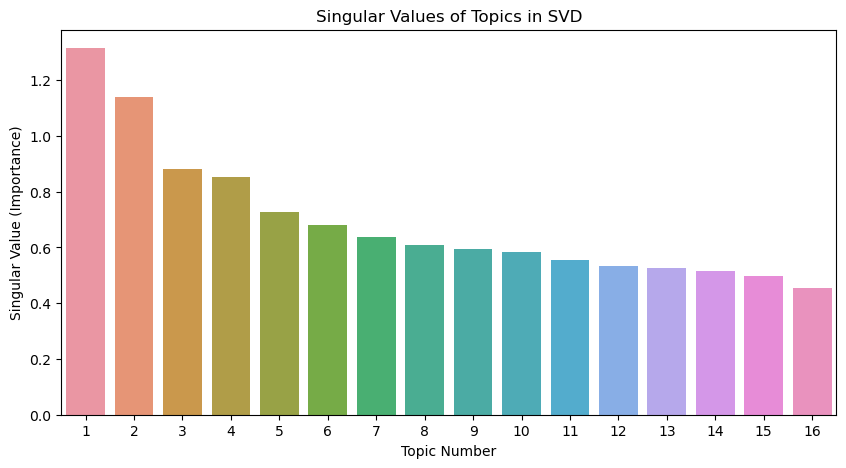

In [87]:
# Bar plot of the singular values

plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(1, len(sigma) + 1), y=sigma)
plt.xlabel("Topic Number")
plt.ylabel("Singular Value (Importance)")
plt.title("Singular Values of Topics in SVD")
plt.show()